# Cats and Dogs Dataset

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import warnings
warnings.filterwarnings("ignore")

# local_zip = 'cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/Projects/DL Lab/Week 4/Dataset')
# zip_ref.close()


In [2]:
base_dir = 'Dataset\cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Load training dataset using
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    validation_split = 0.2,
    subset = 'training',
    shuffle=True,
    seed=42
)

# Load validation dataset using
validation_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    validation_split = 0.2,
    subset = 'validation',
    shuffle=True,
    seed=42
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [5]:
# Load testing dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

Found 1000 files belonging to 2 classes.


In [6]:
# Normalize pixel values
train_dataset = train_dataset.map(lambda x, y: (x/255, y))
validation_dataset = validation_dataset.map(lambda x, y: (x/255, y))
test_dataset = test_dataset.map(lambda x, y: (x/255, y))

In [21]:
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras import Sequential

# Create an augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

# Apply augmentation to training dataset only
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

### LeNet Implementation

In [8]:
from tensorflow.keras import layers, models

def create_lenet():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(img_height, img_width, 3)),
        layers.AveragePooling2D(pool_size=(2, 2)),
        
        # Second convolutional layer
        layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        
        # Flatten layer
        layers.Flatten(),
        
        # Fully connected layers
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(2, activation='softmax')  # 2 classes: cats and dogs
    ])
    
    return model

In [9]:
model = create_lenet()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 110, 110, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 53, 53, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)              

In [10]:
history = model.fit(
    augmented_train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    batch_size=batch_size,
)

Epoch 1/30
50/50 [==============================] - 10s 132ms/step - loss: 0.7826 - accuracy: 0.5156 - val_loss: 0.6900 - val_accuracy: 0.5025
Epoch 2/30
50/50 [==============================] - 6s 126ms/step - loss: 0.6892 - accuracy: 0.5238 - val_loss: 0.6778 - val_accuracy: 0.5925
Epoch 3/30
50/50 [==============================] - 6s 120ms/step - loss: 0.6853 - accuracy: 0.5619 - val_loss: 0.6791 - val_accuracy: 0.5475
Epoch 4/30
50/50 [==============================] - 7s 131ms/step - loss: 0.6796 - accuracy: 0.5650 - val_loss: 0.6638 - val_accuracy: 0.6075
Epoch 5/30
50/50 [==============================] - 6s 124ms/step - loss: 0.6804 - accuracy: 0.5681 - val_loss: 0.6764 - val_accuracy: 0.5500
Epoch 6/30
50/50 [==============================] - 6s 120ms/step - loss: 0.6699 - accuracy: 0.5750 - val_loss: 0.6491 - val_accuracy: 0.6400
Epoch 7/30
50/50 [==============================] - 6s 116ms/step - loss: 0.6626 - accuracy: 0.5881 - val_loss: 0.6715 - val_accuracy: 0.5550
Epoch

In [11]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

32/32 [==============================] - 1s 14ms/step - loss: 0.6848 - accuracy: 0.6320
Test Loss: 0.6847587823867798
Test Accuracy: 0.6320000290870667


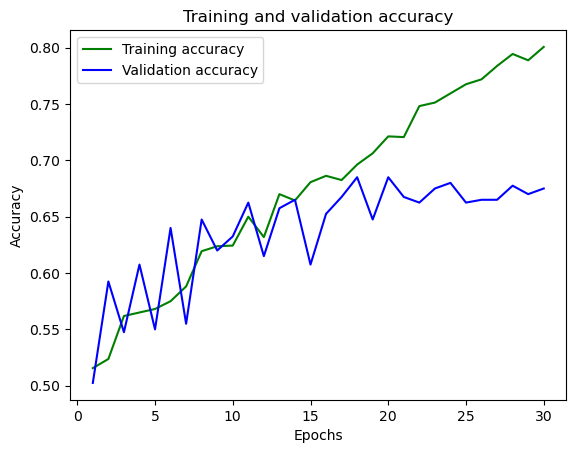

In [13]:
import matplotlib.pyplot as plt

#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

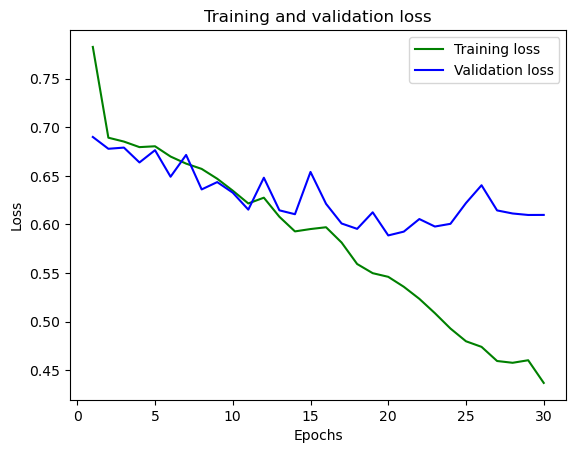

In [15]:
#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the above we can see, LeNet overfits and performs decently on the dataset

### AlexNet

In [38]:
def create_alexnet():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(96, kernel_size=(11,11), strides=4, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Second Convolutional Layer
        layers.Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Third Convolutional Layer
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        
        # Fourth Convolutional Layer
        layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        
        # Fifth Convolutional Layer|
        layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(3,3), strides=2),
        
        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2, activation='softmax')  # 2 classes for cats and dogs
    ])
    
    return model

In [39]:
model = create_alexnet ()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_25 (Bat  (None, 56, 56, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_26 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [40]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=30,
    batch_size=batch_size,
)

Epoch 1/30
50/50 [==============================] - 9s 156ms/step - loss: 1.5280 - accuracy: 0.5475 - val_loss: 0.7273 - val_accuracy: 0.4550
Epoch 2/30
50/50 [==============================] - 7s 144ms/step - loss: 1.2907 - accuracy: 0.5962 - val_loss: 0.8146 - val_accuracy: 0.4550
Epoch 3/30
50/50 [==============================] - 7s 146ms/step - loss: 1.1229 - accuracy: 0.6319 - val_loss: 0.9067 - val_accuracy: 0.4550
Epoch 4/30
50/50 [==============================] - 7s 144ms/step - loss: 1.0759 - accuracy: 0.6162 - val_loss: 0.8264 - val_accuracy: 0.4550
Epoch 5/30
50/50 [==============================] - 7s 143ms/step - loss: 1.0073 - accuracy: 0.6381 - val_loss: 0.9157 - val_accuracy: 0.4550
Epoch 6/30
50/50 [==============================] - 7s 143ms/step - loss: 0.9441 - accuracy: 0.6425 - val_loss: 1.1010 - val_accuracy: 0.4550
Epoch 7/30
50/50 [==============================] - 7s 142ms/step - loss: 0.9302 - accuracy: 0.6506 - val_loss: 1.0470 - val_accuracy: 0.4600
Epoch 

In [35]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

32/32 [==============================] - 1s 27ms/step - loss: 0.5724 - accuracy: 0.7280
Test Loss: 0.572401225566864
Test Accuracy: 0.7279999852180481


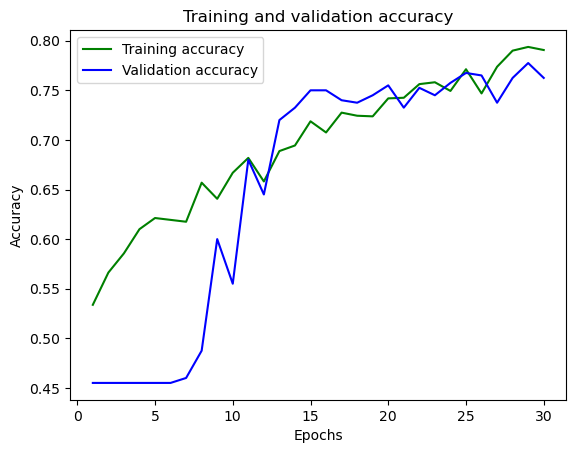

In [36]:
#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

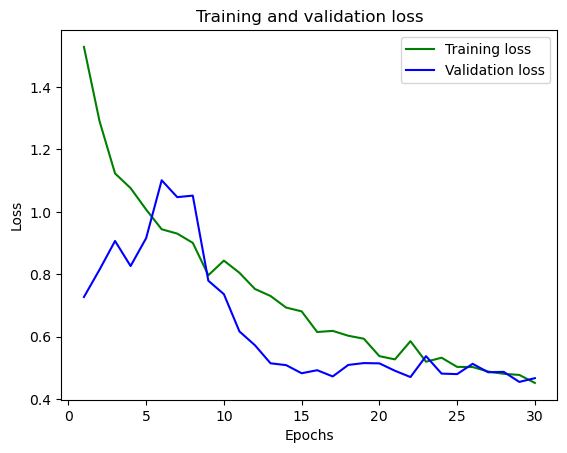

In [41]:
#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### VGG-16 Model

In [45]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_31 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [54]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=10,
    batch_size=batch_size,
)

Epoch 1/10
50/50 [==============================] - 17s 323ms/step - loss: 0.6058 - acc: 0.6750 - val_loss: 0.4038 - val_acc: 0.8375
Epoch 2/10
50/50 [==============================] - 17s 340ms/step - loss: 0.4251 - acc: 0.8281 - val_loss: 0.3086 - val_acc: 0.9000
Epoch 3/10
50/50 [==============================] - 13s 267ms/step - loss: 0.3651 - acc: 0.8612 - val_loss: 0.2749 - val_acc: 0.8800
Epoch 4/10
50/50 [==============================] - 13s 261ms/step - loss: 0.3311 - acc: 0.8744 - val_loss: 0.2347 - val_acc: 0.9225
Epoch 5/10
50/50 [==============================] - 13s 264ms/step - loss: 0.3078 - acc: 0.8731 - val_loss: 0.2249 - val_acc: 0.9150
Epoch 6/10
50/50 [==============================] - 13s 265ms/step - loss: 0.2773 - acc: 0.8906 - val_loss: 0.2067 - val_acc: 0.9350
Epoch 7/10
50/50 [==============================] - 13s 261ms/step - loss: 0.2738 - acc: 0.8981 - val_loss: 0.1986 - val_acc: 0.9300
Epoch 8/10
50/50 [==============================] - 13s 264ms/step - 

The validation accuracy stopped at 0.9400 for further epochs

Adding hidden layers caused the validation accuracy to plateau, very quickly

32/32 [==============================] - 7s 191ms/step - loss: 0.2177 - acc: 0.9150
Test Loss: 0.21769939363002777
Test Accuracy: 0.9150000214576721


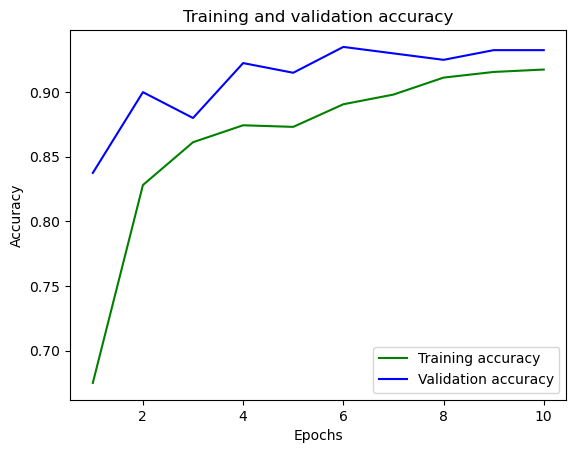

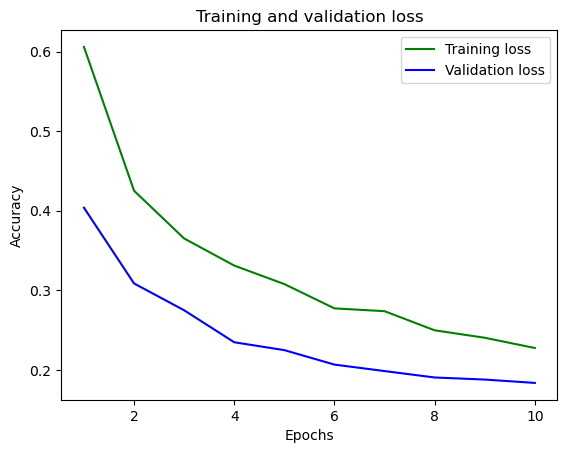

In [56]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#Plotting losses
training_loss = history.history['acc']
validation_loss = history.history['val_acc']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### GoogleNet (InceptionNetV3)

In [57]:
from keras.applications import inception_v3

base_model = inception_v3.InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

87910968/87910968 [==============================] - 14s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_37 (Conv2D)             (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_30 (BatchN  (None, 111, 111, 32  96         ['conv2d_37[0][0]']              
 ormalization)       

In [61]:
model = Sequential([
    base_model, 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [62]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=15,
    batch_size=batch_size,
)

Epoch 1/15
50/50 [==============================] - 14s 207ms/step - loss: 0.2027 - accuracy: 0.9469 - val_loss: 0.0863 - val_accuracy: 0.9775
Epoch 2/15
50/50 [==============================] - 9s 168ms/step - loss: 0.1144 - accuracy: 0.9756 - val_loss: 0.0583 - val_accuracy: 0.9850
Epoch 3/15
50/50 [==============================] - 9s 169ms/step - loss: 0.0878 - accuracy: 0.9781 - val_loss: 0.1133 - val_accuracy: 0.9750
Epoch 4/15
50/50 [==============================] - 9s 169ms/step - loss: 0.0699 - accuracy: 0.9862 - val_loss: 0.1762 - val_accuracy: 0.9700
Epoch 5/15
50/50 [==============================] - 9s 168ms/step - loss: 0.0847 - accuracy: 0.9837 - val_loss: 0.0644 - val_accuracy: 0.9850
Epoch 6/15
50/50 [==============================] - 9s 168ms/step - loss: 0.0599 - accuracy: 0.9844 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 7/15
50/50 [==============================] - 9s 168ms/step - loss: 0.0583 - accuracy: 0.9887 - val_loss: 0.0583 - val_accuracy: 0.9850
Epoch

32/32 [==============================] - 3s 83ms/step - loss: 0.0758 - accuracy: 0.9880
Test Loss: 0.07584010809659958
Test Accuracy: 0.9879999756813049


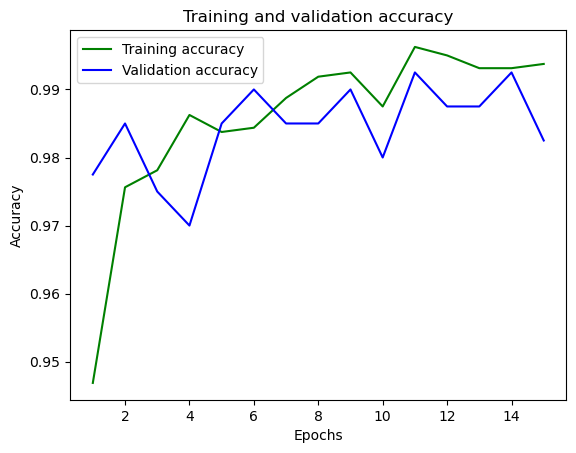

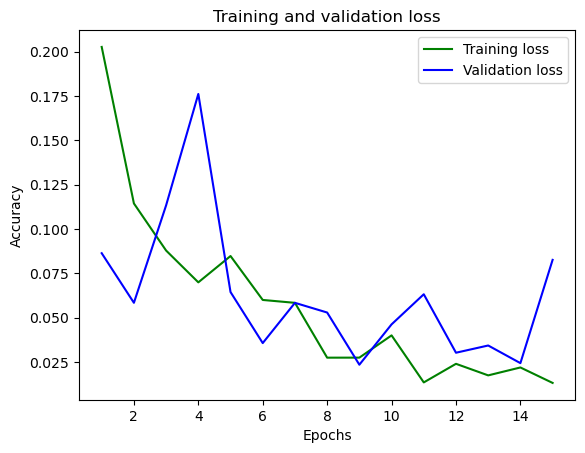

In [63]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Hidden layers increased the accuracy by 0.1

### ResNet50

In [12]:
from keras.applications import ResNet50
from keras import layers, Sequential
base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers     
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [32]:
model = Sequential([
    base_model, 
    layers.GlobalAveragePooling2D(),    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')   
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [33]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=30,
    batch_size=batch_size,
)

Epoch 1/30
50/50 [==============================] - 12s 181ms/step - loss: 0.7644 - accuracy: 0.4925 - val_loss: 0.6869 - val_accuracy: 0.5175
Epoch 2/30
50/50 [==============================] - 8s 159ms/step - loss: 0.7058 - accuracy: 0.5063 - val_loss: 0.6964 - val_accuracy: 0.4650
Epoch 3/30
50/50 [==============================] - 8s 159ms/step - loss: 0.7097 - accuracy: 0.4963 - val_loss: 0.7135 - val_accuracy: 0.4550
Epoch 4/30
50/50 [==============================] - 8s 159ms/step - loss: 0.6996 - accuracy: 0.4956 - val_loss: 0.6980 - val_accuracy: 0.4625
Epoch 5/30
50/50 [==============================] - 8s 160ms/step - loss: 0.6939 - accuracy: 0.5144 - val_loss: 0.6777 - val_accuracy: 0.5450
Epoch 6/30
50/50 [==============================] - 8s 159ms/step - loss: 0.6939 - accuracy: 0.5125 - val_loss: 0.6924 - val_accuracy: 0.4775
Epoch 7/30
50/50 [==============================] - 8s 160ms/step - loss: 0.6909 - accuracy: 0.5294 - val_loss: 0.6764 - val_accuracy: 0.6525
Epoch

32/32 [==============================] - 2s 66ms/step - loss: 0.6636 - accuracy: 0.6140
Test Loss: 0.663606584072113
Test Accuracy: 0.6140000224113464


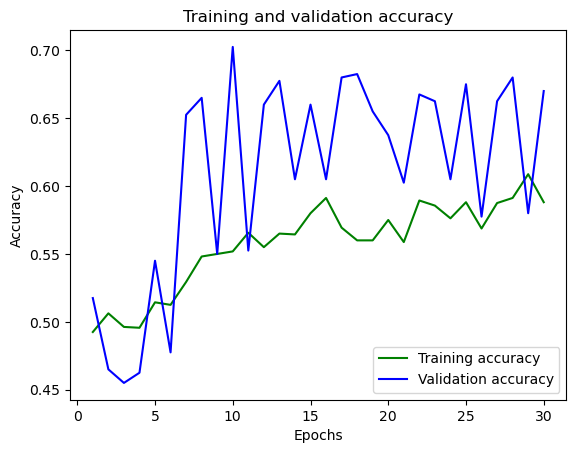

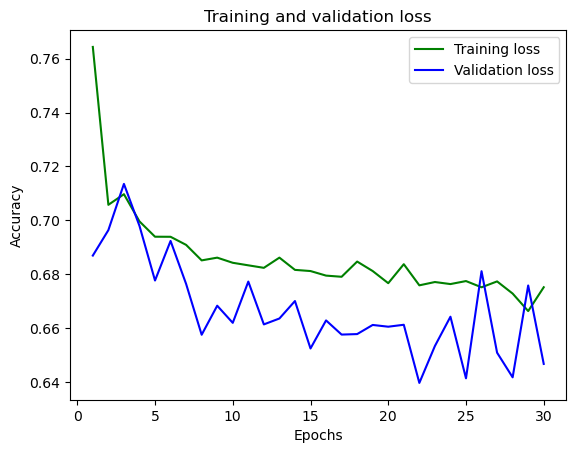

In [34]:
import matplotlib.pyplot as plt

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ResNet probably didn't perform well due to not having enough hidden layers

### EfficientNetB0

In [ ]:
from keras.applications import EfficientNetB0
from keras import layers, Sequential
from matplotlib import pyplot as plt
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers     
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
model = Sequential([
    base_model, 
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [24]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=30,
    batch_size=batch_size,
)

Epoch 1/30
50/50 [==============================] - 11s 119ms/step - loss: 25.6345 - accuracy: 0.5225 - val_loss: 0.7024 - val_accuracy: 0.4550
Epoch 2/30
50/50 [==============================] - 5s 94ms/step - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6956 - val_accuracy: 0.4550
Epoch 3/30
50/50 [==============================] - 5s 95ms/step - loss: 0.6953 - accuracy: 0.4975 - val_loss: 0.6909 - val_accuracy: 0.5450
Epoch 4/30
50/50 [==============================] - 5s 94ms/step - loss: 0.6946 - accuracy: 0.5013 - val_loss: 0.6909 - val_accuracy: 0.5450
Epoch 5/30
50/50 [==============================] - 5s 95ms/step - loss: 0.6948 - accuracy: 0.4963 - val_loss: 0.6982 - val_accuracy: 0.4550
Epoch 6/30
50/50 [==============================] - 5s 95ms/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.6892 - val_accuracy: 0.5450
Epoch 7/30
50/50 [==============================] - 5s 96ms/step - loss: 0.6978 - accuracy: 0.4900 - val_loss: 0.6891 - val_accuracy: 0.5450
Epoch 8/30

32/32 [==============================] - 2s 45ms/step - loss: 0.7041 - accuracy: 0.5000
Test Loss: 0.7041469812393188
Test Accuracy: 0.5


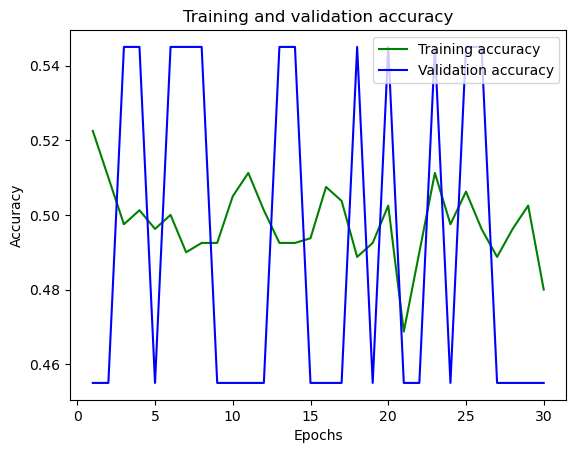

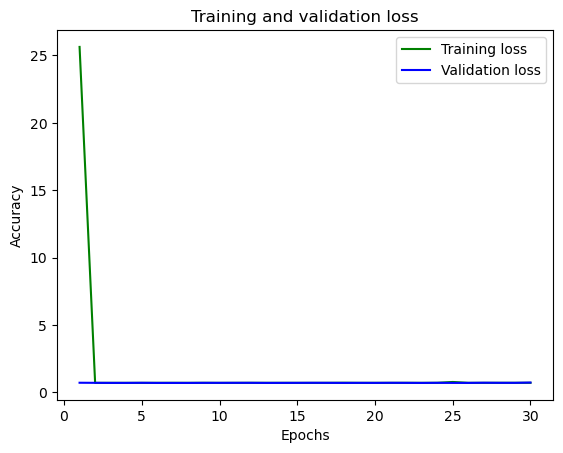

In [25]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The EfficientNetb0 is random guessing, confirmed from the fact after several experiments on changing:
1. Number of Hidden layers
2. Number of neurons in hidden layers
3. learning rate
4. using GolbalAveragePooling, MaxPooling

Might be because it requires a lot more hidden layers for it to perform well

### MobileNet v2

In [26]:
from keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers     
base_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [27]:
model = Sequential([
    base_model, 
    layers.Flatten(),    
    # layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [28]:
history = model.fit(
    augmented_train_dataset,   
    validation_data=validation_dataset,
    epochs=30,
    batch_size=batch_size,  
)

Epoch 1/30
50/50 [==============================] - 7s 87ms/step - loss: 0.2886 - accuracy: 0.9038 - val_loss: 0.0735 - val_accuracy: 0.9900
Epoch 2/30
50/50 [==============================] - 4s 76ms/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0736 - val_accuracy: 0.9800
Epoch 3/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0626 - accuracy: 0.9762 - val_loss: 0.0627 - val_accuracy: 0.9850
Epoch 4/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0746 - val_accuracy: 0.9825
Epoch 5/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0459 - accuracy: 0.9825 - val_loss: 0.0976 - val_accuracy: 0.9800
Epoch 6/30
50/50 [==============================] - 4s 75ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0955 - val_accuracy: 0.9775
Epoch 7/30
50/50 [==============================] - 4s 75ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.1364 - val_accuracy: 0.9700
Epoch 8/30
50

32/32 [==============================] - 1s 35ms/step - loss: 0.0703 - accuracy: 0.9820
Test Loss: 0.07034800946712494
Test Accuracy: 0.9819999933242798


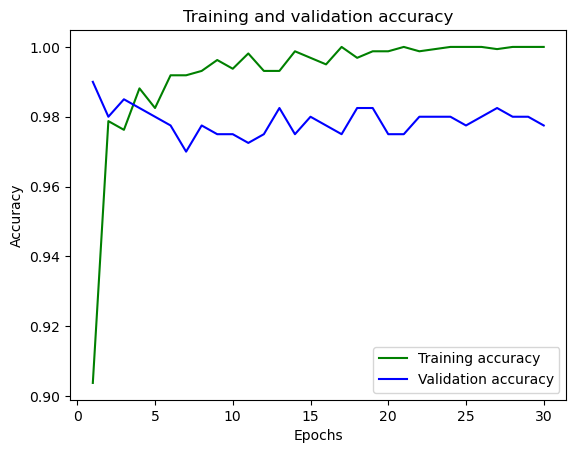

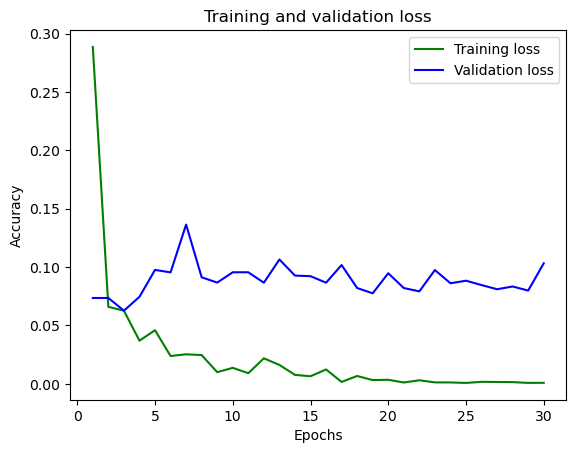

In [29]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_dataset, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#Plotting losses
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training accuracy')
plt.plot(epoch_range, validation_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_range = range(1, len(training_loss) + 1)

plt.plot(epoch_range, training_loss, 'g', label='Training loss')
plt.plot(epoch_range, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()